Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Introdução à Análise de Dados em Saúde com Python**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG

Acesse: https://ciia-saude.medicina.ufmg.br/

# Introdução ao Geoprocessamento de dados em saúde

In [1]:
# importar a biblioteca do Pandas para trabalhar com base de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
from google.colab import files

import statistics  as sts

In [2]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS.xlsx'

dados = pd.read_excel(arquivo)
dados.sample(3)

,Unnamed: 0,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,...,IG_TERMO,HOUVE_CESAREA,HOUVE_LACERACAO,HOUVE_CM,PARIDADE,PESO_VIAVEIS,PESO_US,PESO_ALTA,BAIXO_APGAR5,PARTO_CESAREO
186,186,2014-02-14,2014-02-15,1,1,0.0,39.0,39.0,Não,Parto Normal,...,Termo,Não,Não,Não,Nulípara,2700.0,1700.0,2550.0,Não,Não
190,190,2014-06-24,2014-06-25,1,1,0.0,39.0,39.0,Sim,Parto Normal,...,Termo,Não,Sim,Sim,Nulípara,3235.0,2235.0,3085.0,Não,Não
495,495,2014-03-19,2014-03-21,2,1,0.0,35.0,39.0,Sim,Parto Normal,...,Prematuro,Não,Sim,Sim,Nulípara,NaN,NaN,1555.0,Sim,Não


# Mapas

In [3]:
# Importando as bibliotecas

# folium para trabalhar com mapas
import folium
from branca.element import Figure

In [4]:
# Configurar uma área de imagem de 600 x 500 pixels
figMapa = Figure(height=500, width=500)

# Precisamos informar uma localização (latitude, longitude) e o zoom (altura do mapa),
# para o mapa aparecer corretamente na tela

# Coordenadas retiradas do Google Maps / Centralizado no bairro da lagoinha
latitude = -19.90692178459391
logitude = -43.9430414030567

mapa = folium.Map(location=[latitude, logitude], zoom_start=13, tiles='cartodbpositron')

figMapa.add_child(mapa)

# existem diversas formas de ver os mapas, propriedade 'tiles' indica que tipo de visualização queremos
# 'cartodbpositron' é um mapa de ruas mais acinzentado, ótimo para trabalhar com marcadores sobrepostos.

Saiba mais: # https://deparkes.co.uk/2016/06/10/folium-map-tiles/

In [5]:
# Vamos incluir um marcador no mapa (pin)

# Coordenadas retiradas do Google Maps / UFMG
latitude = -19.868833539658212
logitude = -43.967379583007826

# Criando um marcador (pin)
pin = folium.Marker(location=[latitude, logitude])

# adicionando o marcador (pin) no mapa
pin.add_to(mapa)

# mostrar o mapa atualizado
mapa

In [6]:
# Vamos incluir +2 marcadores no mapa (pin)

nome = 'Faculdade de Medicina'
latitude = -19.9240989
logitude = -43.9294088

# Criando um marcador (pin) e adicionando no mapa
pin = folium.Marker(location=[latitude, logitude], popup=nome)
pin.add_to(mapa)

nome = 'Prefeitura de BH'
latitude = -19.923612
logitude = -43.936584

# Criando um marcador (pin) e adicionando no mapa
pin = folium.Marker(location=[latitude, logitude], popup=nome)
pin.add_to(mapa)

# mostrar o mapa atualizado
mapa

# Dados e mapas com arquivos geojson

In [7]:
import geopandas as gpd
import requests

# arquivos que estão na internet que são muito pesados, precisam ser lidos desta forma
url = "https://ftp.medicina.ufmg.br/cursosciia/iads/GDF_Estados_DadosIBGE_2024_final.geojson"

response = requests.get(url)
with open("GDF_Estados_DadosIBGE_2024_final.geojson", "wb") as f:
    f.write(response.content)

# Carregar o shapefile dos municípios
gdf_estados = gpd.read_file("GDF_Estados_DadosIBGE_2024_final.geojson")
gdf_estados.sample(3)

,UF_SIGLA,ESTADO,REGIAO_SIGLA,REGIAO,CAPITAL,AREA_KM,POP_E2024,POP_C2022,IDH_2010,PIB_2021,ALFABET_2016,MORT_INF_2016,EXPECT_VIDA_2016,geometry
1,AL,Alagoas,NE,Nordeste,Maceió,27767.7,3220104,3127683,0.631,76266000,80.6,0.0195,71.6,"MULTIPOLYGON (((-35.15263 -8.91373, -35.15628 ..."
9,MA,Maranhão,NE,Nordeste,São Luís,331983.3,7010960,6755805,0.639,124981000,83.3,0.0213,70.6,"MULTIPOLYGON (((-44.00896 -2.40071, -44.01407 ..."
4,BA,Bahia,NE,Nordeste,Salvador,564692.7,14850513,14141626,0.660,352618000,87.0,0.0173,73.5,"MULTIPOLYGON (((-38.64899 -18.03612, -38.65822..."


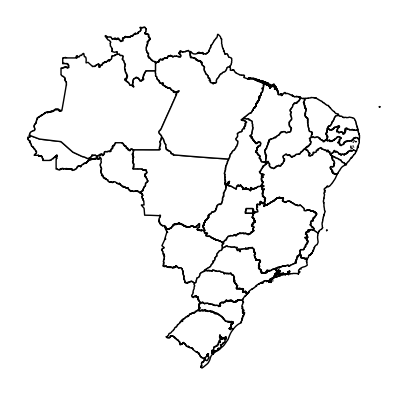

In [8]:
# Plotar os polígonos dos municípios
ax = gdf_estados.plot(figsize=(5, 5), color='white', edgecolor='black')
ax.set_axis_off()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

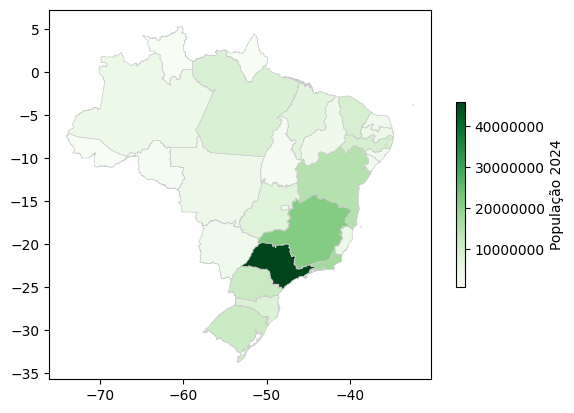

In [9]:
# Plot the states
gdf_estados.plot(column='POP_E2024', cmap="Greens",  linewidth=0.5, edgecolor='0.8', legend=True,
                     legend_kwds={'shrink': 0.5, 'label': 'População 2024', 'format': '%.0f'})

titulo = 'População por estados'
ax.title.set_text(titulo)
ax.set_axis_off()

nome_mapa = 'Figura_Atividade_5.png'
plt.savefig(nome_mapa)
files.download(nome_mapa)

plt.show()